<a href="https://colab.research.google.com/github/sganguly3000ai/makemore/blob/main/makemore_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bigram character level language model using neural network MLP**

In [14]:
import torch
import numpy as np
import string
import matplotlib.pyplot as plt
import torch.nn.functional as F
import pandas as pd


In [16]:
# create a list of words or names
#f = open('sample_data/yob1996.txt', encoding="utf-8")
names   = np.loadtxt('sample_data/yob1996.txt', delimiter=',', usecols = 0, dtype = str)
lnames  = np.char.lower(names)
words  = pd.unique(lnames)

# for l in f:
#   print (l)


In [5]:
print(f'{names} : {lnames} : {words}')


['Emily' 'Jessica' 'Ashley' ... 'Zishe' 'Zoran' 'Zyler'] : ['emily' 'jessica' 'ashley' ... 'zishe' 'zoran' 'zyler'] : ['emily' 'jessica' 'ashley' ... 'zishe' 'zoran' 'zyler']


In [17]:
names.shape,lnames.shape,words.shape

((26426,), (26426,), (24306,))

In [7]:
type(words)

numpy.ndarray

In [18]:


"""
# create a list of words or names
words = ['sumit','sorit','swapna','suraj','sujit', 'sujoy', 'manoj', 'amit',
         'kajol', 'steve', 'andrew','bob', 'cindy', 'ebrahim', 'daku', 'johny',
         'timmy', 'david', 'tarun', 'nancy', 'edith', 'jason', 'kyle', 'joseph',
         'kimberly', 'emma', 'irene', 'michael', 'scott', 'valentino']
# build the vocabulary of characters and mappings to/from integers
# '.' is the special character signifying the start or end of a word

"""
chars = list(string.ascii_lowercase)
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [19]:
print(f'Num of words = {len(words)}')
print(f'Vocabulary = {itos}')

Num of words = 24306
Vocabulary = {1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [126]:
# build the dataset

def build_dataset(words):
  block_size = 3 # context length: how many characters do we take to predict the next one?
  X, Y = [],[]

  print (type(X))

  for w in words:
    #print (w)
    context = [0] * block_size

    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '---->', itos[ix])
      context = context[1:] + [ix] #crop and append
      #print(context)

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  return X, Y

np.random.seed(42)
np.random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))


Xtr, Ytr =  build_dataset(words[:n1])
Xdev, Ydev=  build_dataset(words[n1:n2])
Xtest, Ytest=  build_dataset(words[n2:])

<class 'list'>
<class 'list'>
<class 'list'>


In [ ]:
# make it more respectable and lets put the code together

In [127]:
Xtr.shape, Ytr.shape, Xdev.shape, Ydev.shape, Xtest.shape, Ytest.shape # datasets (inputs and labels)

(torch.Size([142897, 3]),
 torch.Size([142897]),
 torch.Size([17748, 3]),
 torch.Size([17748]),
 torch.Size([17931, 3]),
 torch.Size([17931]))

In [35]:
# define the parameters
g   =   torch.Generator().manual_seed(2147483647)
C   =   torch.randn((27,2), generator = g)
W1  =   torch.randn((6,100), generator = g)
b1  =   torch.randn((100), generator = g)
W2  =   torch.randn((100,27), generator = g)      # 27 possible outputs for 27 lowercase english characters
b2  =   torch.randn((27), generator = g)
parameters  = [C, W1, b1, W2, b2]

In [36]:
sum(p.nelement() for p in parameters)             # number of parameters in total

3481

In [37]:
for p in parameters:
  p.requires_grad = True

In [ ]:
# to figure out what learning rate to use
# guess a learning rate (one low and one high)
# plug in the (guessed) low learning rate and train the model - observe the rate at which the loss is going down
# plug in the (guessed) high learning rate and train the model - observe the rate at which the loss is going down
# the (guessed) low and high lr should both not make the loss go down fairly quickly
# for this particular model it seems like the low and high should be .001 and 1

lre = torch.linspace(-3,0,1000)   # create evenly spaced values between -3 and 0
lrs = 10**lre                     # taking the exponent gives us a tensor of values in the range 1 and .001

# now instead of using the guessed learning rate (lr), we will run the model with each learning rate in lrs
# and track the losses for a 1000 iterations of training the model

In [40]:

# train model use Xtr


# lri   = []    # used to track the learning rate
# lossi = []    # used to track the losses for the given lr


for p in parameters:
  p.requires_grad = True

for i in range(10000):

  # minibatch construct (pluck 31 samples out of the total number of samples randomly

  ix = torch.randint(0, Xtr.shape[0], (31,))


  # forward pass
  emb     = C[Xtr[ix]]                              # shape is 31, 3, 2
  h       = torch.tanh(emb.view(-1,6) @ W1 + b1)  # shape is 31, 100
  logits  = h @ W2 + b2                           # shape is 31, 27 (27 possible outputs for 27 lowercase english characters)
  # counts  = logits.exp()
  # probs   = counts / counts.sum(1, keepdims = True)
  # loss    = -probs[torch.arange(num_of_labels),Y].log().mean()
  loss = F.cross_entropy(logits, Ytr[ix])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  # gradient update
  for p in parameters:
    #lr        = lrs[i]
    p.data   += -0.1 * p.grad

"""
    p.data    += -lr * p.grad

  # track stats for lr
  lri.append(lre[i])
  lossi.append(loss.item())
"""


print(loss.item())

2.3527002334594727


In [63]:
# what does loss look like with train data
emb     = C[Xtr]                              # shape is 31, 3, 2
h       = torch.tanh(emb.view(-1,6) @ W1 + b1)  # shape is 31, 100
logits  = h @ W2 + b2                           # shape is 31, 27 (27 possible outputs for 27 lowercase english characters)
# counts  = logits.exp()
# probs   = counts / counts.sum(1, keepdims = True)
# loss    = -probs[torch.arange(num_of_labels),Y].log().mean()
loss = F.cross_entropy(logits, Ytr)

print(loss.item())

2.5666401386260986


In [62]:
# test the model use Xdev

emb     = C[Xdev]                              # shape is 31, 3, 2
h       = torch.tanh(emb.view(-1,6) @ W1 + b1)  # shape is 31, 100
logits  = h @ W2 + b2                           # shape is 31, 27 (27 possible outputs for 27 lowercase english characters)
# counts  = logits.exp()
# probs   = counts / counts.sum(1, keepdims = True)
# loss    = -probs[torch.arange(num_of_labels),Y].log().mean()
loss = F.cross_entropy(logits, Ydev)


print(loss.item())

2.5784599781036377


In [59]:
# train and dev(test) shows similar loss. so the model is not overfitting
# the model is underfitting since the train and dev losses are very similar
# that basically tells us that the neural net is not large enough
# so lets make the network larger

g   =   torch.Generator().manual_seed(2147483647)
C   =   torch.randn((27,2), generator = g)
W1  =   torch.randn((6,300), generator = g)
b1  =   torch.randn((300), generator = g)
W2  =   torch.randn((300,27), generator = g)      # 27 possible outputs for 27 lowercase english characters
b2  =   torch.randn((27), generator = g)
parameters  = [C, W1, b1, W2, b2]

In [69]:
sum(p.nelement() for p in parameters)

10281

In [79]:


# train model use Xtr but a nn with the hideen layer having 300 neurons


lri   = []    # used to track the learning rate
lossi = []    # used to track the losses for the given lr
stepi = []    # track the steps


for p in parameters:
  p.requires_grad = True

for i in range(10000):

  # minibatch construct (pluck 31 samples out of the total number of samples randomly

  ix = torch.randint(0, Xtr.shape[0], (31,))


  # forward pass
  emb     = C[Xtr[ix]]                              # shape is 31, 3, 2
  h       = torch.tanh(emb.view(-1,6) @ W1 + b1)  # shape is 31, 100
  logits  = h @ W2 + b2                           # shape is 31, 27 (27 possible outputs for 27 lowercase english characters)
  # counts  = logits.exp()
  # probs   = counts / counts.sum(1, keepdims = True)
  # loss    = -probs[torch.arange(num_of_labels),Y].log().mean()
  loss = F.cross_entropy(logits, Ytr[ix])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  # gradient update
  for p in parameters:
    #lr        = lrs[i]
    p.data   += -0.01 * p.grad


# track stats for lr
#  lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.item())



print(loss.item())

2.3125839233398438


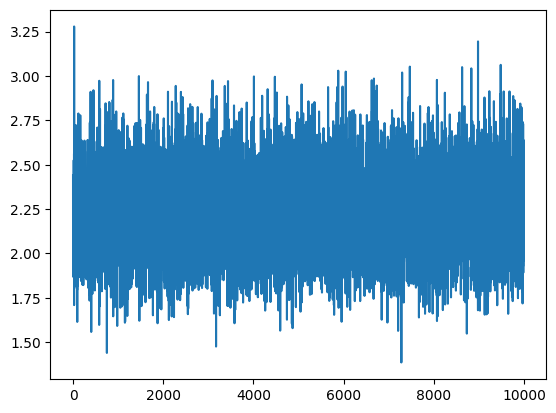

In [80]:
plt.plot(stepi,lossi) # looks like 10**-1, which is .1 is a good learning rate

In [81]:
# what does loss look like with train data
emb     = C[Xtr]                              # shape is 31, 3, 2
h       = torch.tanh(emb.view(-1,6) @ W1 + b1)  # shape is 31, 100
logits  = h @ W2 + b2                           # shape is 31, 27 (27 possible outputs for 27 lowercase english characters)
# counts  = logits.exp()
# probs   = counts / counts.sum(1, keepdims = True)
# loss    = -probs[torch.arange(num_of_labels),Y].log().mean()
loss = F.cross_entropy(logits, Ytr)

print(loss.item())

2.2226762771606445


In [82]:
# test the model use Xdev

emb     = C[Xdev]                              # shape is 31, 3, 2
h       = torch.tanh(emb.view(-1,6) @ W1 + b1)  # shape is 31, 100
logits  = h @ W2 + b2                           # shape is 31, 27 (27 possible outputs for 27 lowercase english characters)
# counts  = logits.exp()
# probs   = counts / counts.sum(1, keepdims = True)
# loss    = -probs[torch.arange(num_of_labels),Y].log().mean()
loss = F.cross_entropy(logits, Ydev)


print(loss.item())

2.2424161434173584


In [97]:
C.shape[0]

27

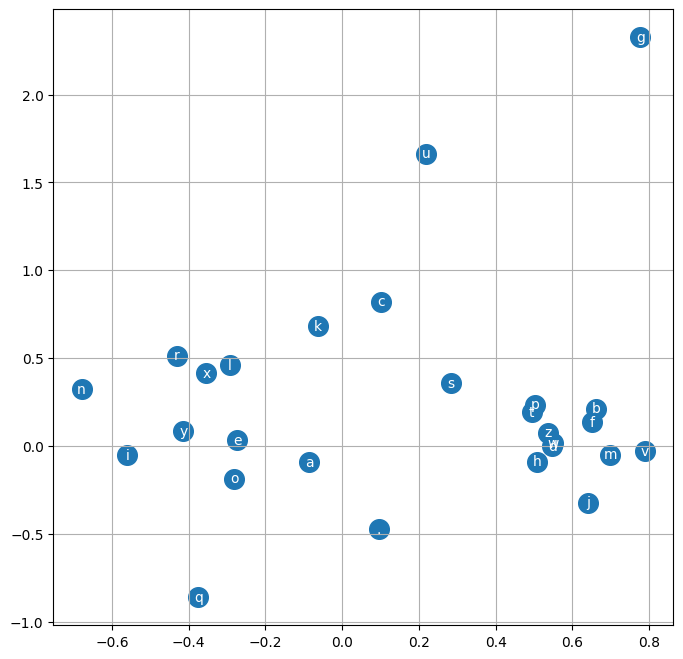

In [98]:
# looks like making the size of the network larger did not make much difference
# so let visualize how the character embedings are looking after the training
# in the plot we see that the model has learned somewhat and there are some clustering of the characters
# the characters are not all over the place
# so now we will increase the dimensions of the embedding C
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
  plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')

In [99]:
# train and dev(test) shows similar loss. so the model is not overfitting
# the model is underfitting since the train and dev losses are very similar
# that basically tells us that the neural net is not large enough
# so lets make the network larger

g   =   torch.Generator().manual_seed(2147483647)
C   =   torch.randn((27,10), generator = g) # change C from(27,2) to (27,10) each character represented by 10 numbers
# changing the embedding dimensions to 27,10 make the input to the first layer as 3*10 = 30
W1  =   torch.randn((30,200), generator = g)  # we lowered the neuron size to 200 from 300
b1  =   torch.randn((200), generator = g)
W2  =   torch.randn((200,27), generator = g)      # 27 possible outputs for 27 lowercase english characters
b2  =   torch.randn((27), generator = g)
parameters  = [C, W1, b1, W2, b2]

In [100]:
lri   = []    # used to track the learning rate
lossi = []    # used to track the losses for the given lr
stepi = []    # track the steps

In [113]:


# train model use Xtr but a nn with the hideen layer having 300 neurons


for p in parameters:
  p.requires_grad = True

for i in range(50000):

  # minibatch construct (pluck 31 samples out of the total number of samples randomly

  ix = torch.randint(0, Xtr.shape[0], (31,))


  # forward pass
  emb     = C[Xtr[ix]]                              # shape is 31, 3, 2
  h       = torch.tanh(emb.view(-1,30) @ W1 + b1)   # shape is 31, 200
  logits  = h @ W2 + b2                             # shape is 31, 27 (27 possible outputs for 27 lowercase english characters)
  # counts  = logits.exp()
  # probs   = counts / counts.sum(1, keepdims = True)
  # loss    = -probs[torch.arange(num_of_labels),Y].log().mean()
  loss = F.cross_entropy(logits, Ytr[ix])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  # gradient update
  for p in parameters:
    #lr        = lrs[i]
    p.data   += -0.01 * p.grad


# track stats for lr
#  lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())



print(loss.item())

2.1509103775024414


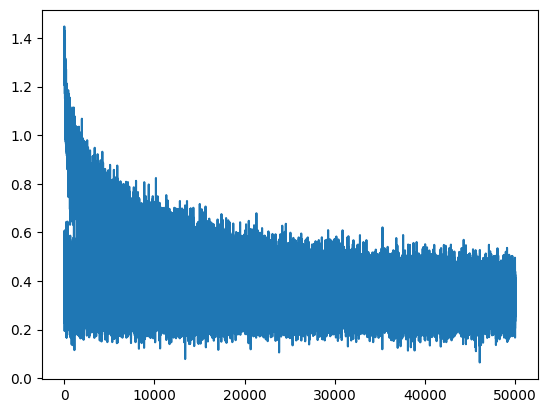

In [114]:
plt.plot(stepi, lossi)

In [118]:
# what does loss look like with train data
emb     = C[Xtr]
h       = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits  = h @ W2 + b2                           # shape is (number of names in dev dataset), 27  (27 possible outputs for 27 lowercase english characters)
# counts  = logits.exp()
# probs   = counts / counts.sum(1, keepdims = True)
# loss    = -probs[torch.arange(num_of_labels),Y].log().mean()
loss = F.cross_entropy(logits, Ytr)

print(loss.item())

2.0716214179992676


In [119]:
# what does loss look like with dev data
emb     = C[Xdev]
h       = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits  = h @ W2 + b2                           # shape is (number of names in dev dataset), 27 (27 possible outputs for 27 lowercase english characters)
# counts  = logits.exp()
# probs   = counts / counts.sum(1, keepdims = True)
# loss    = -probs[torch.arange(num_of_labels),Y].log().mean()
loss = F.cross_entropy(logits, Ydev)

print(loss.item())

2.123164176940918


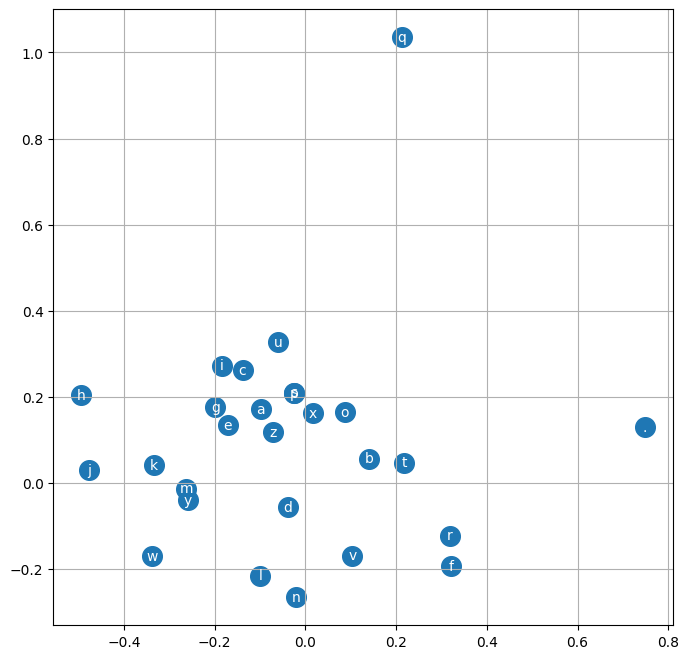

In [117]:
# looks like making the size of the network larger did not make much difference
# so let visualize how the character embedings are looking after the training
# in the plot we see that the model has learned somewhat and there are some clustering of the characters
# the characters are not all over the place
# so now we will increase the dimensions of the embedding C
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
  plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')

In [173]:
# sample from the model
block_size = 3

g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

  out = []
  context = [0]*block_size # initialize with '...'
  while True:

    emb     = C[torch.tensor([context])] #(1,block_size,d)
    h       = torch.tanh(emb.view(1,-1) @ W1 + b1)
    logits  = h @ W2 + b2
    probs   = F.softmax(logits, dim=1)
    ix      = torch.multinomial(probs, num_samples=1, generator=g).item()
    context = context[1:] + [ix]

    out.append(ix)

    if ix == 0:
      break

  print(''.join(itos[i] for i in out))

montaymyanneeen.
nichylle.
emmantejdone.
cadered.
tei.
jemporen.
edelleananar.
katelma.
keann.
shabergian.
jestin.
jowan.
jonnterian.
brence.
ruy.
julieh.
yuma.
myshayla.
hal.
salynn.
